### Convolutional Neural Network on Dataset - 2

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! head dataset_2_preprocessed

head: cannot open 'dataset_2_preprocessed' for reading: No such file or directory


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/dataset_2_preprocessed.csv')
df = df.drop(columns=['id'])
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62,70,1.0250,3.0,0.0,1,1,1,1,122.0,...,39.0,7900,3.90,0,0,1,0,1,1,0
1,54,70,1.0150,0.0,0.0,1,0,1,1,233.0,...,42.0,10600,5.15,1,0,1,0,1,1,0
2,47,80,1.0175,1.0,0.0,1,0,1,1,114.0,...,37.0,6750,4.30,0,1,1,1,1,1,0
3,43,60,1.0250,0.0,0.0,1,0,1,1,108.0,...,43.0,7200,5.50,1,1,1,0,1,1,1
4,42,100,1.0150,4.0,0.0,1,1,1,0,293.5,...,39.0,8300,4.60,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,46,60,1.0100,1.0,0.0,1,0,1,1,163.0,...,28.0,14600,3.20,0,0,1,0,1,1,0
258,50,90,1.0200,1.5,1.0,1,0,1,1,89.0,...,17.0,6500,4.20,0,0,1,0,0,0,0
259,23,80,1.0250,0.0,0.0,1,0,1,1,111.0,...,41.0,7200,5.00,1,1,1,0,1,1,1
260,38,80,1.0200,0.0,0.0,1,0,1,1,99.0,...,44.0,7300,6.40,1,1,1,0,1,1,1


In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62,70,1.0250,3.0,0.0,1,1,1,1,122.0,...,39.0,7900,3.90,0,0,1,0,1,1,0
1,54,70,1.0150,0.0,0.0,1,0,1,1,233.0,...,42.0,10600,5.15,1,0,1,0,1,1,0
2,47,80,1.0175,1.0,0.0,1,0,1,1,114.0,...,37.0,6750,4.30,0,1,1,1,1,1,0
3,43,60,1.0250,0.0,0.0,1,0,1,1,108.0,...,43.0,7200,5.50,1,1,1,0,1,1,1
4,42,100,1.0150,4.0,0.0,1,1,1,0,293.5,...,39.0,8300,4.60,0,1,1,1,1,1,0


In [ ]:
df.shape

(262, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             262 non-null    int64  
 1   bp              262 non-null    int64  
 2   sg              262 non-null    float64
 3   al              262 non-null    float64
 4   su              262 non-null    float64
 5   rbc             262 non-null    int64  
 6   pc              262 non-null    int64  
 7   pcc             262 non-null    int64  
 8   ba              262 non-null    int64  
 9   bgr             262 non-null    float64
 10  bu              262 non-null    float64
 11  sc              262 non-null    float64
 12  sod             262 non-null    float64
 13  pot             262 non-null    float64
 14  hemo            262 non-null    float64
 15  pcv             262 non-null    float64
 16  wc              262 non-null    int64  
 17  rc              262 non-null    flo

In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,...,262.00000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,52.351145,76.259542,1.017338,0.998092,0.496183,0.835878,0.244275,0.900763,0.938931,155.921756,...,39.51145,8279.198473,4.697328,0.625954,0.633588,0.912214,0.229008,0.812977,0.854962,0.381679
std,16.570954,14.375153,0.005532,1.323598,1.060427,0.371095,0.430479,0.299552,0.239915,78.560435,...,8.32378,2835.242178,0.923995,0.484802,0.482746,0.283525,0.420998,0.390676,0.352813,0.486728
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,9.00000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,70.000000,1.013125,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,103.250000,...,33.25000,6662.500000,4.062500,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,55.000000,80.000000,1.017500,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,127.250000,...,41.00000,7900.000000,4.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,177.500000,...,45.50000,9775.000000,5.300000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.00000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
X=df.drop(columns='classification',axis=1)
Y=df['classification']
# scaler=StandardScaler()
# scaler=MinMaxScaler(feature_range=(0,1))   
scaler = RobustScaler()  
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X, columns=X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.14,random_state =42)

In [ ]:
"""scaler = MinMaxScaler(feature_range=(0,1))   
# scaler = RobustScaler()  
scaled_X = scaler.fit_transform(X)
X = scaled_X
print(X[:10])

# Splitting into train and test data - 80% train, 20% test
split_pct = int(0.8*len(X))
train_X, test_X = X[:split_pct], X[split_pct:]
train_Y, test_Y = Y[:split_pct], Y[split_pct:]
print("\n\n")
print(train_X[:10])"""

'scaler = MinMaxScaler(feature_range=(0,1))   \n# scaler = RobustScaler()  \nscaled_X = scaler.fit_transform(X)\nX = scaled_X\nprint(X[:10])\n\n# Splitting into train and test data - 80% train, 20% test\nsplit_pct = int(0.8*len(X))\ntrain_X, test_X = X[:split_pct], X[split_pct:]\ntrain_Y, test_Y = Y[:split_pct], Y[split_pct:]\nprint("\n\n")\nprint(train_X[:10])'

## Sequential Model in Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(8,input_dim=len(X_train.columns),activation='relu'))
model.add(Dense(4,activation='relu')) # y = max(0, x)
#model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # y = 1 / 1+e^ -z

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 200       
                                                                 
 dense_28 (Dense)            (None, 4)                 36        
                                                                 
 dense_29 (Dense)            (None, 1)                 5         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=Y_train,epochs=256,verbose=1)

Epoch 1/256
8/8 [==============================] - 1s 2ms/step - loss: 0.6276 - accuracy: 0.5867
Epoch 2/256
8/8 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.6444
Epoch 3/256
8/8 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.6533
Epoch 4/256
8/8 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.6444
Epoch 5/256
8/8 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.6622
Epoch 6/256
8/8 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.6800
Epoch 7/256
8/8 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7022
Epoch 8/256
8/8 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7244
Epoch 9/256
8/8 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7422
Epoch 10/256
8/8 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7511
Epoch 11/256
8/8 [===========

In [ ]:
predicts = model.predict(X_test)

In [ ]:
# Less than 0.5, No. More than 0.5, Yes.
predicts = predicts.round()

In [ ]:
def print_result(data):
  df = pd.DataFrame((np.array(data)).reshape(1,-1), columns=X_train.columns)
  standard_data=scaler.transform(df)
  df = pd.DataFrame(standard_data, columns=X_train.columns)
  predict=model.predict(df)
  if predict==0:
    print("You are healthy")
  else:
    print("You are suffering from Chronic Kidney Disease")

In [ ]:
data=[65,75,1.010,3,0,0,1,0,1,122,42,1.7,136,4.7,12.6,45,7900,2.8,0,0,1,0,1,1]
print_result(data)
data=[75,75,1.025,3,0,1,1,0,1,128,43,280,128,4,12.6,50,10000,2.8,1,0,1,0,1,1]
print_result(data)

You are suffering from Chronic Kidney Disease
You are healthy


In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(Y_test,predicts))
print('Recall: %.3f' % recall_score(Y_test, predicts))
print('Accuracy: %.3f' % accuracy_score(Y_test, predicts))
print('F1-Score: %.3f' % f1_score(Y_test, predicts))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1-Score: 1.000


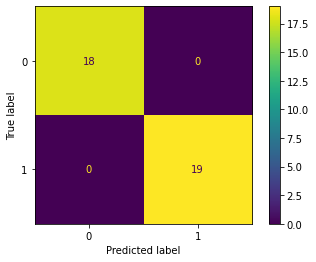

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predicts.round())